In [1]:
! pip install sklearn-pandas
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# For preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn_pandas import DataFrameMapper 

import torch # For building the networks 
import torchtuples as tt # Some useful functions
# change pycox import datasets and df= read.csv

df_train=pd.read_csv('D:/UNOS_NEW/no_dephit_train_cindex7_redo.csv', sep=',')
df_test=pd.read_csv('D:/UNOS_NEW/no_dephit_test_cindex7_redo.csv', sep=',')
df_val=pd.read_csv('D:/UNOS_NEW/no_dephit_val_cindex7_redo.csv', sep=',')
from pycox.models import DeepHitSingle
from pycox.evaluation import EvalSurv
## Uncomment to install `sklearn-pandas`
# ! pip install sklearn-pandas
np.random.seed(1234)
_ = torch.manual_seed(123)

df_train['DAYSWAIT_CHRON']=df_train['DAYSWAIT_CHRON'].astype('float32') 
df_train['ETHCAT']=df_train['ETHCAT'].astype('float32')
df_train['DIAG']=df_train['DIAG'].astype('float32')
df_train['LIFE_SUP_TCR']=df_train['LIFE_SUP_TCR'].astype('float32')
df_train['VENTILATOR_TCR']=df_train['VENTILATOR_TCR'].astype('float32')
df_train['FUNC_STAT_TCR']=df_train['FUNC_STAT_TCR'].astype('float32')
df_train['INIT_AGE']=df_train['INIT_AGE'].astype('float32')
df_train['PORTAL_VEIN_TCR']=df_train['PORTAL_VEIN_TCR'].astype('float32')
df_train['WORK_INCOME_TCR']=df_train['WORK_INCOME_TCR'].astype('float32')                              
df_train['INIT_BILIRUBIN']=df_train['INIT_BILIRUBIN'].astype('float32') 
df_train['INIT_SERUM_CREAT']=df_train['INIT_SERUM_CREAT'].astype('float32') 
df_train['duration']=df_train['duration'].astype('float32')
df_train['event']=df_train['event'].astype('int32')

df_test['DAYSWAIT_CHRON']=df_test['DAYSWAIT_CHRON'].astype('float32') 
df_test['ETHCAT']=df_test['ETHCAT'].astype('float32')
df_test['DIAG']=df_test['DIAG'].astype('float32')
df_test['LIFE_SUP_TCR']=df_test['LIFE_SUP_TCR'].astype('float32')
df_test['VENTILATOR_TCR']=df_test['VENTILATOR_TCR'].astype('float32')
df_test['FUNC_STAT_TCR']=df_test['FUNC_STAT_TCR'].astype('float32')
df_test['INIT_AGE']=df_test['INIT_AGE'].astype('float32')
df_test['PORTAL_VEIN_TCR']=df_test['PORTAL_VEIN_TCR'].astype('float32')
df_test['WORK_INCOME_TCR']=df_test['WORK_INCOME_TCR'].astype('float32')                              
df_test['INIT_BILIRUBIN']=df_test['INIT_BILIRUBIN'].astype('float32') 
df_test['INIT_SERUM_CREAT']=df_test['INIT_SERUM_CREAT'].astype('float32') 
df_test['duration']=df_test['duration'].astype('float32')
df_test['event']=df_test['event'].astype('int32')
 
df_val['DAYSWAIT_CHRON']=df_val['DAYSWAIT_CHRON'].astype('float32') 
df_val['ETHCAT']=df_val['ETHCAT'].astype('float32')
df_val['DIAG']=df_val['DIAG'].astype('float32')
df_val['LIFE_SUP_TCR']=df_val['LIFE_SUP_TCR'].astype('float32')
df_val['VENTILATOR_TCR']=df_val['VENTILATOR_TCR'].astype('float32')
df_val['FUNC_STAT_TCR']=df_val['FUNC_STAT_TCR'].astype('float32')
df_val['INIT_AGE']=df_val['INIT_AGE'].astype('float32')
df_val['PORTAL_VEIN_TCR']=df_val['PORTAL_VEIN_TCR'].astype('float32')
df_val['WORK_INCOME_TCR']=df_val['WORK_INCOME_TCR'].astype('float32')                              
df_val['INIT_BILIRUBIN']=df_val['INIT_BILIRUBIN'].astype('float32') 
df_val['INIT_SERUM_CREAT']=df_val['INIT_SERUM_CREAT'].astype('float32') 
df_val['duration']=df_val['duration'].astype('float32')
df_val['event']=df_val['event'].astype('int32')


In [2]:
import numpy as np
import pandas as pd

class OrderedCategoricalLong:
    """Transform pandas series or numpy array to categorical, and get (long) values,
    i.e. index of category. Useful for entity embeddings.
    Zero is reserved for unknown categories or nans.
    Keyword Arguments:
        min_per_category {int} -- Number of instances required to not be set to nan (default: {20})
        return_series {bool} -- If return a array or pd.Series (default: {False})
    
    Returns:
        [pd.Series] -- Series with long values reffering to categories.
    """
    def __init__(self, min_per_category=20, return_series=False):
        
        self.min_per_category = min_per_category
        self.return_series = return_series

    def fit(self, series, y=None):
        series = pd.Series(series).copy()
        smaller = series.value_counts() < self.min_per_category
        values = smaller[smaller].index.values
        for v in values:
            series[series == v] = np.nan
        self.categories = series.astype('category').cat.categories
        return self
    
    def transform(self, series, y=None):
        series = pd.Series(series).copy()
        transformed = pd.Categorical(series, categories=self.categories, ordered=True)
        transformed = pd.Series(transformed, index=series.index)
        transformed = transformed.cat.codes.astype('int64') + 1
        return transformed if self.return_series else transformed.values
    
    def fit_transform(self, series, y=None):
        return self.fit(series, y).transform(series, y)
cols_std = ['DAYSWAIT_CHRON','INIT_AGE', 'INIT_BILIRUBIN','INIT_SERUM_CREAT'] # numeric variables
cols_bin = ['LIFE_SUP_TCR','VENTILATOR_TCR'] # binary variables
cols_cat = ['ETHCAT','DIAG','FUNC_STAT_TCR','PORTAL_VEIN_TCR','WORK_INCOME_TCR'] # categorical variables


standardize = [([col], StandardScaler()) for col in cols_std]
leave = [(col, None) for col in cols_bin]
categorical = [(col, OrderedCategoricalLong()) for col in cols_cat]

x_mapper_float = DataFrameMapper(standardize + leave)
x_mapper_long = DataFrameMapper(categorical)  # we need a separate mapper to convert data to 'int64'

x_fit_transform = lambda df: tt.tuplefy(x_mapper_float.fit_transform(df), x_mapper_long.fit_transform(df))
x_transform = lambda df: tt.tuplefy(x_mapper_float.transform(df), x_mapper_long.transform(df))

x_train = x_fit_transform(df_train)
x_val = x_transform(df_val)
x_test = x_transform(df_test)

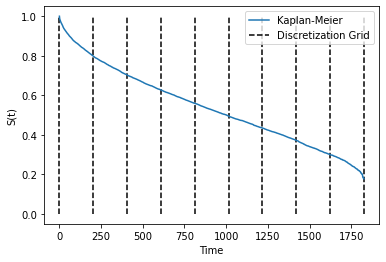

In [3]:
num_durations = 10
scheme = 'equidistant' # or quantiles
labtrans = DeepHitSingle.label_transform(num_durations, scheme)
get_target = lambda df: (df['duration'].values, df['event'].values)
y_train = labtrans.fit_transform(*get_target(df_train))
y_val = labtrans.transform(*get_target(df_val))

train = (x_train, y_train)
val = (x_val, y_val)

# We don't need to transform the test labels
durations_test, events_test = get_target(df_test)

# Plotting discrete intervals
from pycox.utils import kaplan_meier
plt.vlines(labtrans.cuts, 0, 1, colors='black', linestyles="--", label='Discretization Grid')
kaplan_meier(*get_target(df_train)).plot(label='Kaplan-Meier')
plt.ylabel('S(t)')
plt.legend()
_ = plt.xlabel('Time')

In [4]:
num_embeddings = x_train[1].max(0) + 1
embedding_dims = num_embeddings // 2

in_features = x_train[0].shape[1]
out_features = labtrans.out_features
num_nodes = [80,80]
batch_norm = True
dropout = 0.3

net = tt.practical.MixedInputMLP(in_features, num_embeddings, embedding_dims,
                                 num_nodes, out_features, batch_norm, dropout)
                                 
optimizer = tt.optim.AdamWR(decoupled_weight_decay=0.01, cycle_eta_multiplier=0.8,
                            cycle_multiplier=2)

model = DeepHitSingle(net, optimizer, duration_index=labtrans.cuts)

In [5]:
batch_size = 600
lrfind = model.lr_finder(x_train, y_train, batch_size, tolerance=50)
lrfind.get_best_lr()

C:\Users\xiaoz\anaconda3\lib\site-packages\torchtuples\callbacks.py:607: UserWarning: This overload of add is deprecated:
	add(Number alpha, Tensor other)
Consider using one of the following signatures instead:
	add(Tensor other, *, Number alpha) (Triggered internally at  ..\torch\csrc\utils\python_arg_parser.cpp:1050.)
  p.data = p.data.add(-weight_decay * eta, p.data)


0.10722672220103299

In [6]:
model.optimizer.set_lr(0.07)

In [7]:
epochs =100
callbacks = [tt.cb.EarlyStoppingCycle()]
verbose = True 

log = model.fit(x_train, y_train, batch_size, epochs, callbacks, verbose,
                val_data=val)

0:	[0s / 0s],		train_loss: 4.0051,	val_loss: 0.9862
1:	[0s / 0s],		train_loss: 1.2385,	val_loss: 0.7953
2:	[0s / 0s],		train_loss: 0.9738,	val_loss: 0.7786
3:	[0s / 0s],		train_loss: 0.9143,	val_loss: 0.7739
4:	[0s / 0s],		train_loss: 0.8444,	val_loss: 0.7274
5:	[0s / 0s],		train_loss: 0.8223,	val_loss: 0.7074
6:	[0s / 0s],		train_loss: 0.7831,	val_loss: 0.7066
7:	[0s / 1s],		train_loss: 0.7554,	val_loss: 0.6546
8:	[0s / 1s],		train_loss: 0.7278,	val_loss: 0.6424
9:	[0s / 1s],		train_loss: 0.6955,	val_loss: 0.6332
10:	[0s / 1s],		train_loss: 0.6934,	val_loss: 0.6170
11:	[0s / 1s],		train_loss: 0.6663,	val_loss: 0.6122
12:	[0s / 1s],		train_loss: 0.6642,	val_loss: 0.6130
13:	[0s / 1s],		train_loss: 0.6692,	val_loss: 0.6144
14:	[0s / 1s],		train_loss: 0.6548,	val_loss: 0.6122
15:	[0s / 2s],		train_loss: 0.6644,	val_loss: 0.6232
16:	[0s / 2s],		train_loss: 0.6968,	val_loss: 0.6438
17:	[0s / 2s],		train_loss: 0.6618,	val_loss: 0.6173
18:	[0s / 2s],		train_loss: 0.6547,	val_loss: 0.5910
19:

In [8]:
surv = model.interpolate(10).predict_surv_df(x_test)

In [9]:
ev = EvalSurv(surv, durations_test, events_test, censor_surv='km')

In [10]:
ev.concordance_td('antolini')

0.5872763381544924

In [13]:
df_predict=pd.read_csv('D:/UNOS_NEW/dat_imp_no_deep_days_redo.csv', sep=',')

df_predict['DAYSWAIT_CHRON']=df_predict['DAYSWAIT_CHRON'].astype('float32') 
df_predict['ETHCAT']=df_predict['ETHCAT'].astype('float32')
df_predict['DIAG']=df_predict['DIAG'].astype('float32')
df_predict['LIFE_SUP_TCR']=df_predict['LIFE_SUP_TCR'].astype('float32')
df_predict['VENTILATOR_TCR']=df_predict['VENTILATOR_TCR'].astype('float32')
df_predict['FUNC_STAT_TCR']=df_predict['FUNC_STAT_TCR'].astype('float32')
df_predict['INIT_AGE']=df_predict['INIT_AGE'].astype('float32')
df_predict['PORTAL_VEIN_TCR']=df_predict['PORTAL_VEIN_TCR'].astype('float32')
df_predict['WORK_INCOME_TCR']=df_predict['WORK_INCOME_TCR'].astype('float32')                              
df_predict['INIT_BILIRUBIN']=df_predict['INIT_BILIRUBIN'].astype('float32') 
df_predict['INIT_SERUM_CREAT']=df_predict['INIT_SERUM_CREAT'].astype('float32') 


In [14]:
x_test = x_transform(df_predict)

In [15]:
x_predict = x_transform(df_predict)

In [16]:
surv = model.interpolate(10).predict_surv_df(x_predict)

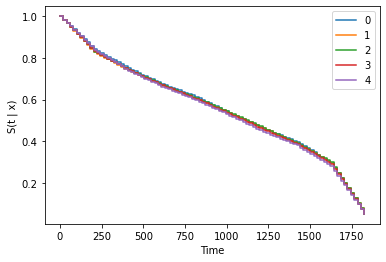

In [17]:
surv.iloc[:, :5].plot(drawstyle='steps-post')
plt.ylabel('S(t | x)')
_ = plt.xlabel('Time')

In [18]:
surv

,0,1,2,3,4,5,6,7,8,9,...,19990,19991,19992,19993,19994,19995,19996,19997,19998,19999
0.000000,0.998855,0.998768,0.998698,0.998824,0.998993,0.999293,0.998858,0.999095,0.998447,0.998917,...,0.998683,0.998959,0.998921,0.998907,0.998932,0.998963,0.999366,0.999087,0.998835,0.999203
20.277777,0.983227,0.981631,0.981849,0.982137,0.983010,0.985466,0.983829,0.985658,0.980507,0.983207,...,0.978326,0.982237,0.984228,0.981540,0.983347,0.982838,0.986905,0.983361,0.981729,0.985004
40.555554,0.967599,0.964494,0.965001,0.965451,0.967028,0.971638,0.968801,0.972222,0.962568,0.967497,...,0.957970,0.965516,0.969536,0.964173,0.967763,0.966713,0.974443,0.967635,0.964624,0.970806
60.833331,0.951971,0.947357,0.948152,0.948765,0.951045,0.957811,0.953773,0.958785,0.944628,0.951787,...,0.937613,0.948794,0.954843,0.946806,0.952179,0.950588,0.961981,0.951909,0.947519,0.956608
81.111108,0.936342,0.930220,0.931304,0.932079,0.935063,0.943984,0.938745,0.945349,0.926689,0.936078,...,0.917257,0.932072,0.940150,0.929438,0.936595,0.934464,0.949520,0.936182,0.930414,0.942410
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1743.888867,0.151044,0.152155,0.152731,0.149762,0.143827,0.157422,0.166485,0.157208,0.164207,0.150356,...,0.166488,0.144514,0.150288,0.146761,0.150083,0.154219,0.168465,0.138719,0.155200,0.163278
1764.166650,0.126776,0.127902,0.128173,0.125967,0.121069,0.130214,0.138239,0.130504,0.137416,0.126267,...,0.137254,0.121451,0.126010,0.124038,0.125832,0.129144,0.137801,0.116912,0.130421,0.134923
1784.444434,0.102508,0.103648,0.103615,0.102172,0.098310,0.103005,0.109993,0.103800,0.110625,0.102177,...,0.108020,0.098387,0.101733,0.101314,0.101582,0.104068,0.107138,0.095105,0.105643,0.106567
1804.722217,0.078239,0.079395,0.079057,0.078377,0.075551,0.075797,0.081747,0.077096,0.083835,0.078088,...,0.078786,0.075324,0.077455,0.078591,0.077331,0.078993,0.076474,0.073297,0.080864,0.078211


In [19]:
surv.to_pickle("D:/UNOS_NEW/no_surv_days_redo.pkl")


In [20]:
unpickled_surv_no_days=pd.read_pickle("D:/UNOS_NEW/no_surv_days_redo.pkl")
unpickled_surv_no_days

,0,1,2,3,4,5,6,7,8,9,...,19990,19991,19992,19993,19994,19995,19996,19997,19998,19999
0.000000,0.998855,0.998768,0.998698,0.998824,0.998993,0.999293,0.998858,0.999095,0.998447,0.998917,...,0.998683,0.998959,0.998921,0.998907,0.998932,0.998963,0.999366,0.999087,0.998835,0.999203
20.277777,0.983227,0.981631,0.981849,0.982137,0.983010,0.985466,0.983829,0.985658,0.980507,0.983207,...,0.978326,0.982237,0.984228,0.981540,0.983347,0.982838,0.986905,0.983361,0.981729,0.985004
40.555554,0.967599,0.964494,0.965001,0.965451,0.967028,0.971638,0.968801,0.972222,0.962568,0.967497,...,0.957970,0.965516,0.969536,0.964173,0.967763,0.966713,0.974443,0.967635,0.964624,0.970806
60.833331,0.951971,0.947357,0.948152,0.948765,0.951045,0.957811,0.953773,0.958785,0.944628,0.951787,...,0.937613,0.948794,0.954843,0.946806,0.952179,0.950588,0.961981,0.951909,0.947519,0.956608
81.111108,0.936342,0.930220,0.931304,0.932079,0.935063,0.943984,0.938745,0.945349,0.926689,0.936078,...,0.917257,0.932072,0.940150,0.929438,0.936595,0.934464,0.949520,0.936182,0.930414,0.942410
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1743.888867,0.151044,0.152155,0.152731,0.149762,0.143827,0.157422,0.166485,0.157208,0.164207,0.150356,...,0.166488,0.144514,0.150288,0.146761,0.150083,0.154219,0.168465,0.138719,0.155200,0.163278
1764.166650,0.126776,0.127902,0.128173,0.125967,0.121069,0.130214,0.138239,0.130504,0.137416,0.126267,...,0.137254,0.121451,0.126010,0.124038,0.125832,0.129144,0.137801,0.116912,0.130421,0.134923
1784.444434,0.102508,0.103648,0.103615,0.102172,0.098310,0.103005,0.109993,0.103800,0.110625,0.102177,...,0.108020,0.098387,0.101733,0.101314,0.101582,0.104068,0.107138,0.095105,0.105643,0.106567
1804.722217,0.078239,0.079395,0.079057,0.078377,0.075551,0.075797,0.081747,0.077096,0.083835,0.078088,...,0.078786,0.075324,0.077455,0.078591,0.077331,0.078993,0.076474,0.073297,0.080864,0.078211
